# Objetivo:

Realizar pronostico con modelo perceptron multicapa y array de 3 dimensiones

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [32]:
# la data importada es diaria

url = 'https://raw.githubusercontent.com/OrlandoBelli/OBH/master/time%20series.txt'

# squeeze = True  # muestra los datos como serie

df = pd.read_csv(url, sep=',', parse_dates=[0], header = None,index_col=0, names = ['fecha','unidades'])
df.head()

,unidades
fecha,
2017-01-02,236
2017-01-03,237
2017-01-04,290
2017-01-05,221
2017-01-07,128


In [33]:
# verificamos que los datos son data frame
type(df)

pandas.core.frame.DataFrame

In [34]:
# verificar los tipos de datos de las columnas
df.dtypes

unidades    int64
dtype: object

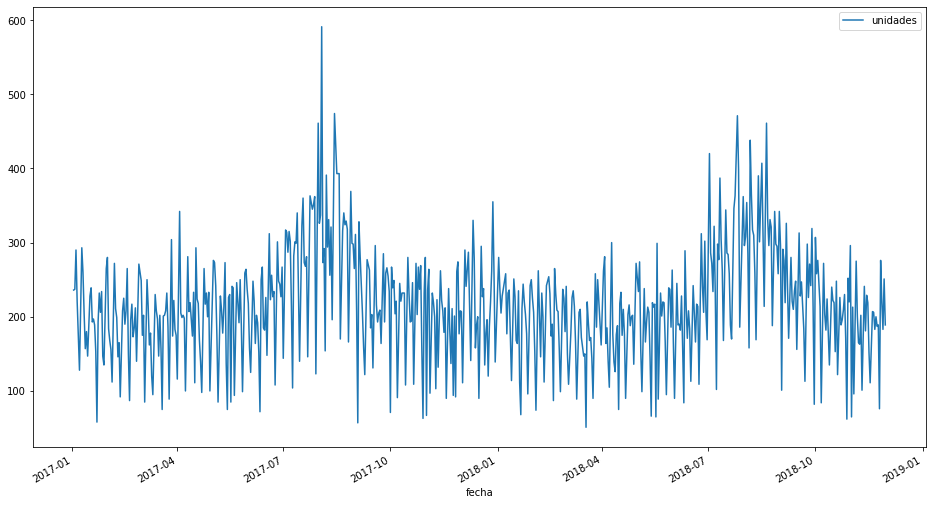

In [35]:
# ploteamos los datos
df.plot()

In [36]:
# shape verificamos la cantidad de datos

df.shape

(604, 1)

In [37]:
# verificamos las fechas mínimas y máximas de la data

print(df.index.min())
print(df.index.max())

2017-01-02 00:00:00
2018-11-30 00:00:00


In [38]:

print(len(df['2017']))
print(len(df['2018']))


315
289


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df.describe()

,unidades
count,604.000000
mean,215.935430
std,75.050304
min,51.000000
25%,171.000000
50%,214.000000
75%,261.250000
max,591.000000


In [40]:
# promediar los valores diarios a promedio por mes
# la resolución (W : weekly o semanal, M mensual)
# se puede utilizar cualquier función de agrupación mean, sum, min, max, std, var

meses = df.resample('M').mean()
meses

,unidades
fecha,
2017-01-31,203.923077
2017-02-28,184.666667
2017-03-31,182.964286
2017-04-30,198.960000
2017-05-31,201.185185
2017-06-30,209.518519
2017-07-31,278.923077
2017-08-31,316.000000
2017-09-30,222.925926


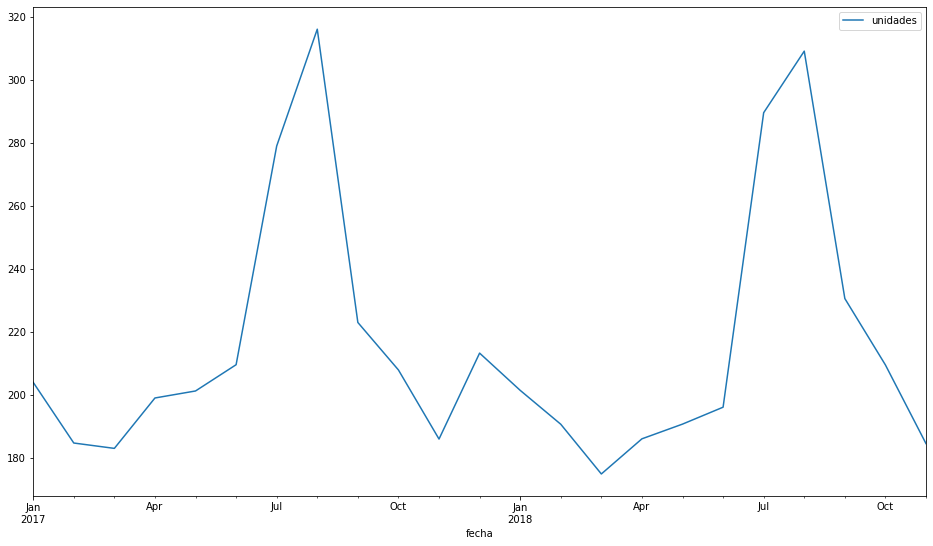

In [41]:
# ploteando meses
meses.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


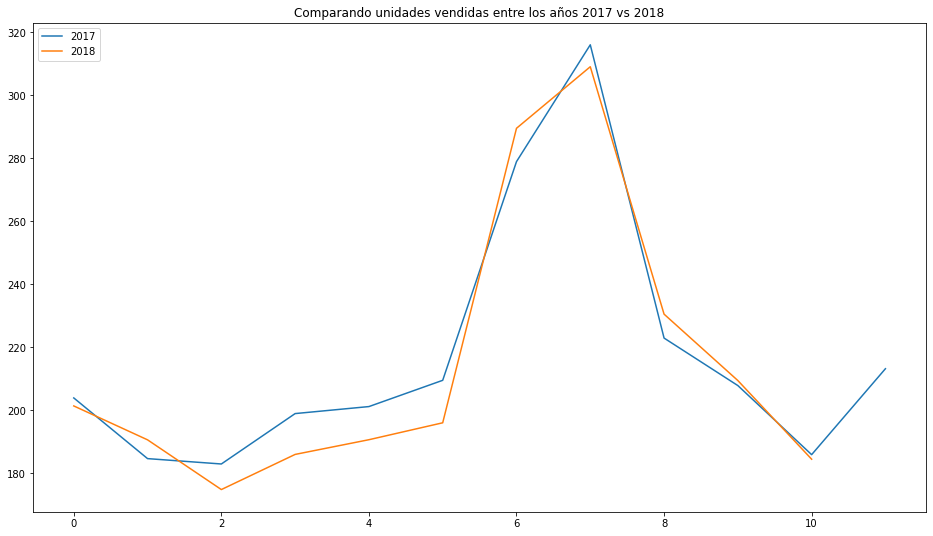

In [42]:
# comparando estacionalidad

plt.plot(meses['2017'].values, label = '2017')
plt.plot(meses['2018'].values, label = '2018')
plt.title('Comparando unidades vendidas entre los años 2017 vs 2018')
plt.legend(loc = 2)
plt.show()

Comparando fechas específicas

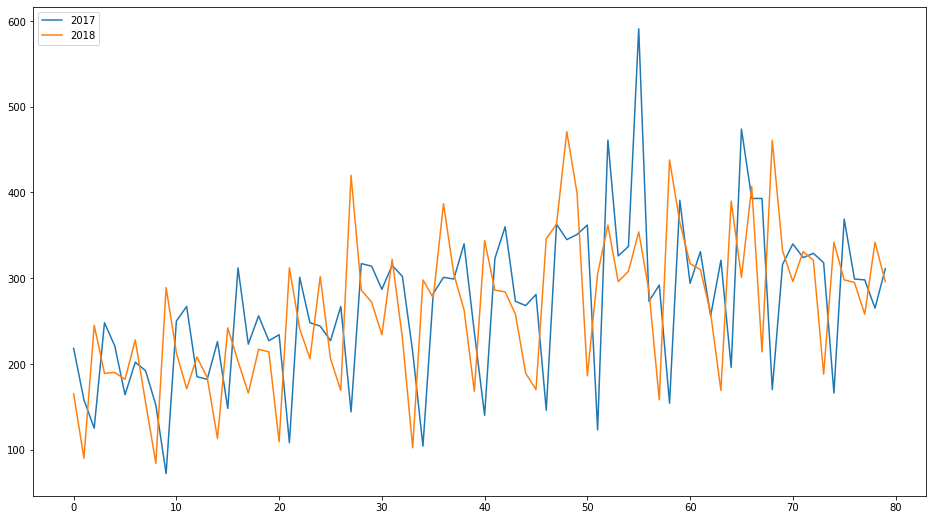

In [43]:
# comportamiento de junio a setiembre 2017 y 2018

periodo2017 = df['2017-06-01':'2017-09-01']
plt.plot(periodo2017.values, label ='2017')
periodo2018 = df['2018-06-01':'2018-09-01']
plt.plot(periodo2018.values, label = '2018')
plt.legend(loc = 2)

# Análisis para redes neuronales
# Transformamos a dataframe y escalamos la serie

In [44]:
PASOS = 7
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()


,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,0.342593,0.344444,0.442593,0.314815,0.142593,0.448148,0.387037,0.283333
8,0.344444,0.442593,0.314815,0.142593,0.448148,0.387037,0.283333,0.196296
9,0.442593,0.314815,0.142593,0.448148,0.387037,0.283333,0.196296,0.238889
10,0.314815,0.142593,0.448148,0.387037,0.283333,0.196296,0.238889,0.177778
11,0.142593,0.448148,0.387037,0.283333,0.196296,0.238889,0.177778,0.327778


Train test split

In [45]:
# split into train and test sets
values = reframed.values
n_train_days = 315 + 289 - (30+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(567, 1, 7) (567,) (30, 1, 7) (30,)


# Creando la red neuronal

In [46]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(units = PASOS, input_shape=(1,PASOS),activation='tanh'))
    # Añadir la segunda capa oculta
    model.add(Dense(units = 40, kernel_initializer = "uniform",  activation = "relu"))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [47]:
crear_modeloFF()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1, 7)              56        
                                                                 
 dense_7 (Dense)             (None, 1, 40)             320       
                                                                 
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 41        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


Entrenando la red neuronal

In [48]:
EPOCHS = 50

model = crear_modeloFF()

history = model.fit(x_train,y_train,epochs = EPOCHS, validation_data=(x_val,y_val), batch_size = PASOS)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 7)              56        
                                                                 
 dense_10 (Dense)            (None, 1, 40)             320       
                                                                 
 flatten_3 (Flatten)         (None, 40)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 41        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
81/81 [==============================] - 1s 4ms/step - loss: 0.1244 - mse: 0.0265 - val_loss: 0.0852 - val_mse: 0.0129
Epoch 2/50
81/81 [==============================] - 0s 2ms

Ploteamos la data de validacion

Text(0.5, 1.0, 'ECM vs. epochs')

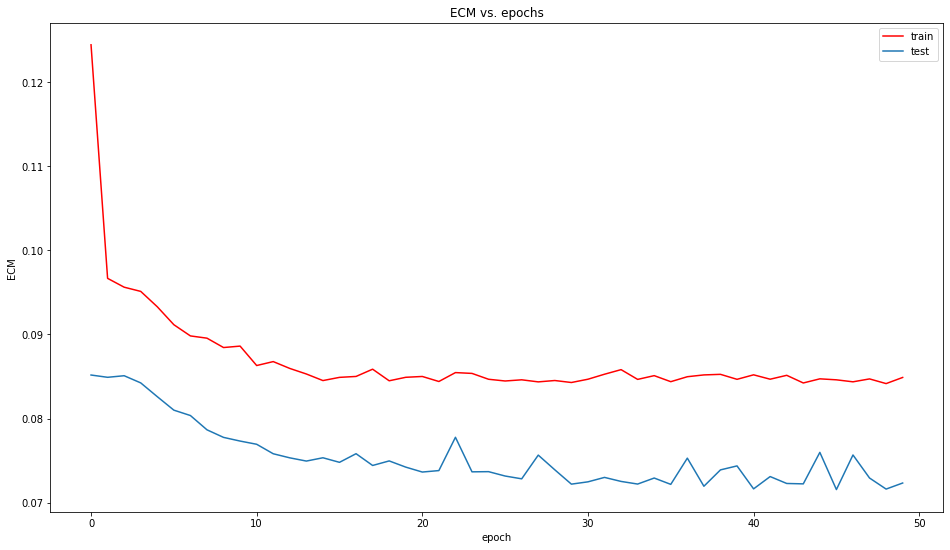

In [49]:
plt.plot(history.history['loss'],color = 'r', label ='train')
plt.plot(history.history['val_loss'], label ='test')
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.legend()
plt.title('ECM vs. epochs')

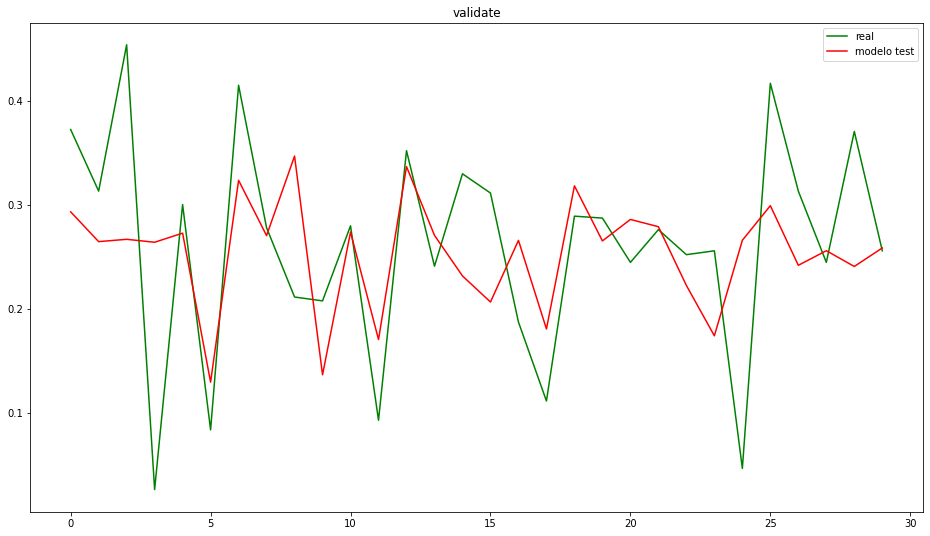

In [50]:
# haremos una predicción con la data de test y comparamos vs real
results = model.predict(x_val)
plt.plot(range(len(y_val)),y_val,c='g',label='real')
plt.plot(range(len(results)),results,c='r', label = 'modelo test')
plt.title('validate')
plt.legend(loc = 'best')
plt.show()

Pronostico de ventas futuras

In [51]:
df.tail()

,unidades
fecha,
2018-11-26,276
2018-11-27,220
2018-11-28,183
2018-11-29,251
2018-11-30,189


In [52]:
# selecciono los últimos 16 dias
ultimosDias = df['2018-11-14':'2018-11-30']
ultimosDias

,unidades
fecha,
2018-11-14,229
2018-11-15,219
2018-11-16,152
2018-11-17,111
2018-11-19,207
2018-11-20,206
2018-11-21,183
2018-11-22,200
2018-11-23,187


In [53]:
len(ultimosDias)

16

Transformamos a df y escalamos

In [54]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values = values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)

# eliminamos la columna que vamos a predecir
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,0.765,0.715,0.380,0.175,0.655,0.650,0.535
8,0.715,0.380,0.175,0.655,0.650,0.535,0.620
9,0.380,0.175,0.655,0.650,0.535,0.620,0.555
10,0.175,0.655,0.650,0.535,0.620,0.555,0.565
11,0.655,0.650,0.535,0.620,0.555,0.565,0.000
12,0.650,0.535,0.620,0.555,0.565,0.000,1.000
13,0.535,0.620,0.555,0.565,0.000,1.000,0.720


In [55]:
# nos interesa la última fila para hacer pronosticos

values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[0.53499997, 0.62      , 0.555     , 0.565     , 0.        ,
         1.        , 0.72      ]],

       [[0.62      , 0.555     , 0.565     , 0.        , 1.        ,
         0.72      , 0.53499997]],

       [[0.555     , 0.565     , 0.        , 1.        , 0.72      ,
         0.53499997, 0.875     ]]], dtype=float32)

# Función Recursiva

Función que rellena huecos

In [56]:
# movel el valor de par al número de días que se desea predecir
par = 7

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(par):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[0.53499997 0.62       0.555      0.565      0.         1.
   0.72      ]]

 [[0.62       0.555      0.565      0.         1.         0.72
   0.53499997]]

 [[0.555      0.565      0.         1.         0.72       0.53499997
   0.875     ]]]
[[[0.62       0.555      0.565      0.         1.         0.72
   0.42526925]]

 [[0.62       0.555      0.565      0.         1.         0.72
   0.53499997]]

 [[0.555      0.565      0.         1.         0.72       0.53499997
   0.875     ]]]
[[[0.555      0.565      0.         1.         0.72       0.42526925
   0.40069163]]

 [[0.62       0.555      0.565      0.         1.         0.72
   0.53499997]]

 [[0.555      0.565      0.         1.         0.72       0.53499997
   0.875     ]]]
[[[0.565      0.         1.         0.72       0.42526925 0.40069163
   0.48154452]]

 [[0.62       0.555      0.565      0.         1.         0.72
   0.53499997]]

 [[0.555      0.565      0.         1.         0.72       0.53499997
   0.875     ]]]
[[[0. 

De df a serie de tiempo y escalado inverso

In [57]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[161.05385187],
       [156.13832823],
       [172.30890778],
       [121.27497765],
       [195.02006013],
       [176.99571051],
       [154.75041616]])

In [58]:
# ploteando el pronostico
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre

,pronostico
0,161.053852
1,156.138328
2,172.308908
3,121.274978
4,195.020060
5,176.995711
6,154.750416


Axis = 0 concatenamos verticalmente

In [59]:
total = pd.concat([ultimosDias.reset_index(),prediccion1SemanaDiciembre], axis =0)
total

,fecha,unidades,pronostico
0,2018-11-14,229.0,NaN
1,2018-11-15,219.0,NaN
2,2018-11-16,152.0,NaN
3,2018-11-17,111.0,NaN
4,2018-11-19,207.0,NaN
5,2018-11-20,206.0,NaN
6,2018-11-21,183.0,NaN
7,2018-11-22,200.0,NaN
8,2018-11-23,187.0,NaN
9,2018-11-24,189.0,NaN


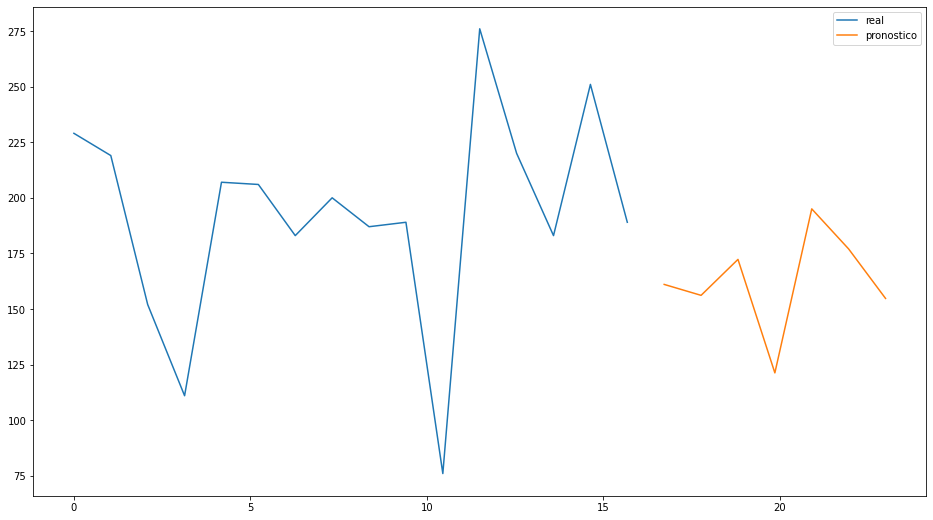

In [60]:
plt.plot(np.linspace(0,len(total),len(total)),total.unidades, label ='real')
plt.plot(np.linspace(0,len(total),len(total)),total.pronostico, label ='pronostico')
plt.legend(loc = 'best')